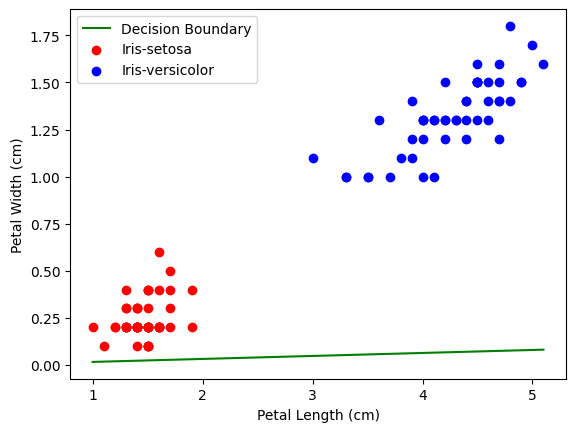

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def sign(x):
    if x >= 0:
        return 1
    else:
        return -1

def PLA(X, Y, w, iters):
    misclassified = []
    for i in range(iters):
        misclassified = []
        for j, x in enumerate(X):
            y = Y[j]
            if sign(np.dot(x, w)) != y:
                misclassified.append(j)
        if not misclassified:
            return w
        random_index = np.random.choice(misclassified)
        x = X[random_index]
        y = Y[random_index]
        w += y * x
    return w

data = pd.read_csv("Iris.csv")
data = data[data["Species"] != "Iris-virginica"]
data["Species"] = data["Species"].map({"Iris-setosa": -1, "Iris-versicolor": 1})

X = data[["PetalLengthCm", "PetalWidthCm"]].to_numpy()
Y = data["Species"].to_numpy()

w = np.zeros(2)
w = PLA(X, Y, w, iters=100)

x1 = np.array([min(X[:, 0]), max(X[:, 0])])
x2 = -(w[0]/w[1]) * x1

plt.scatter(data[data["Species"] == -1]["PetalLengthCm"], data[data["Species"] == -1]["PetalWidthCm"], c='r', label='Iris-setosa')
plt.scatter(data[data["Species"] == 1]["PetalLengthCm"], data[data["Species"] == 1]["PetalWidthCm"], c='b', label='Iris-versicolor')
plt.plot(x1, x2, 'g', label='Decision Boundary')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()